In [29]:
import os
import glob
import sys
import subprocess
import xarray as xr
import numpy as np
import pandas as pd
from time import perf_counter
import matplotlib.pyplot as plt
import datetime

THIS_DIR = os.path.abspath('')
sys.path.append(os.path.join(THIS_DIR, os.pardir, os.pardir))


from src.postprocessing.qnc_defintions import Output_format
from src.postprocessing.qnc_output_parser import QNC_output_parser
from src.postprocessing.qnc_ncdf_reader import QNC_ncdf_reader
    
OUTPUT_DIR = 'output/04_transient_latin_hypercube'

(0.267004, 0.004874, 0.329415, 1.0)

     Reading time variable...      Done! (0.0 sec.)
     Parsing time variable... Done! (0.1 sec.)
     Reading variable names and units... Done! (0.1 sec.)
     Reading all 1D variables... Done! (0.1 sec.)
0
     Reading time variable...      Done! (0.0 sec.)
     Parsing time variable... Done! (0.1 sec.)
     Reading variable names and units... Done! (0.1 sec.)
     Reading all 1D variables... Done! (0.1 sec.)
1
     Reading time variable...      Done! (0.0 sec.)
     Parsing time variable... Done! (0.1 sec.)
     Reading variable names and units... Done! (0.1 sec.)
     Reading all 1D variables... Done! (0.1 sec.)
2
     Reading time variable...      Done! (0.0 sec.)
     Parsing time variable... Done! (0.1 sec.)
     Reading variable names and units... Done! (0.1 sec.)
     Reading all 1D variables... Done! (0.1 sec.)
3
     Reading time variable...      Done! (0.0 sec.)
     Parsing time variable... Done! (0.1 sec.)
     Reading variable names and units... Done! (0.1 sec.)
     Re

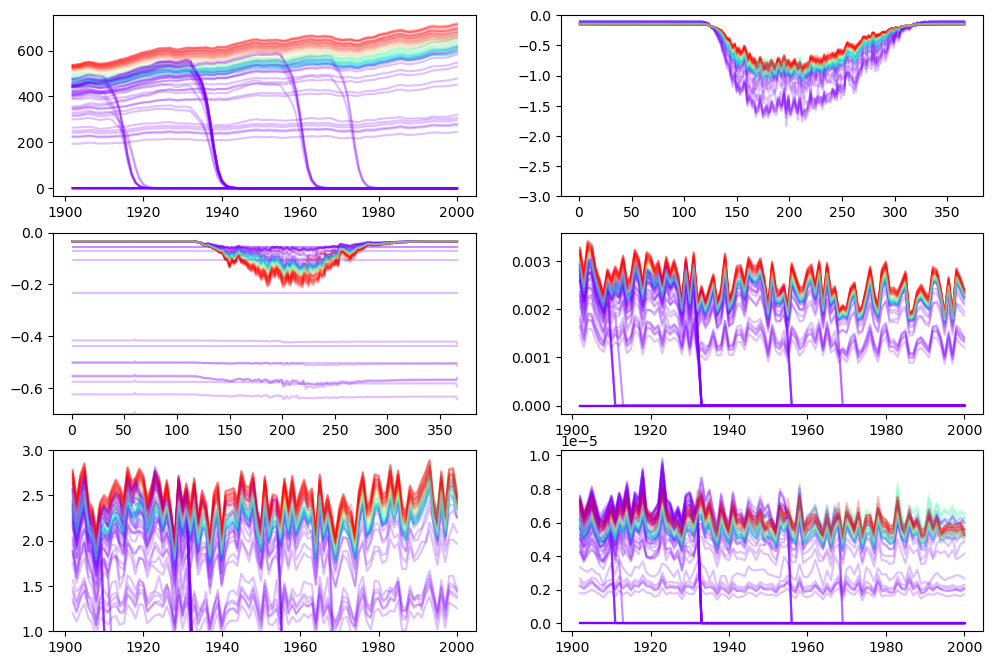

In [109]:
fig = plt.figure(figsize=(12,8))

ax_veg = fig.add_subplot(3, 2, 1)
ax_psi_leaf = fig.add_subplot(3, 2, 2)
ax_psi_stem = fig.add_subplot(3, 2, 3)
ax_gs= fig.add_subplot(3, 2, 4)
ax_gpp = fig.add_subplot(3, 2, 5)
ax_et = fig.add_subplot(3, 2, 6)

for fid in range(0,100):
    parser = QNC_output_parser(os.path.join(OUTPUT_DIR, str(fid)))
    parser.Read()
    output = parser.Available_outputs['transient']
    nc_output = QNC_ncdf_reader(os.path.join(OUTPUT_DIR, str(fid)),
                                            output.Categories,
                                            output.Identifier,
                                            output.Time_resolution
                                            )

    nc_output.Parse_env_and_variables()
    nc_output.Read_all_1D()
    nc_output.Close()
    dfs_veg = nc_output.Datasets_1D['VEG'].groupby(pd.Grouper(key='date', freq='1YE')).mean()
    
    minc = 500
    maxc = 600
    s = maxc-minc
    
    vegmean = dfs_veg['total_veg_c'].mean()
    print(fid)
    col = plt.cm.rainbow(-minc/s + vegmean/s)
    
    dfs_psi = nc_output.Datasets_1D['PHYD'].groupby(pd.Grouper(key='date', freq='d')).mean()
    dfs_assimi = nc_output.Datasets_1D['Q_ASSIMI'].groupby(pd.Grouper(key='date', freq='1YE')).mean()
    dfs_spq = nc_output.Datasets_1D['SPQ'].groupby(pd.Grouper(key='date', freq='1YE')).mean()
    
    dfs_psi['dayofyear'] = dfs_psi.index.dayofyear
    dfs_psi  = dfs_psi.groupby('dayofyear').mean()

    ax_veg.plot(dfs_veg['total_veg_c'], c = col, alpha = 0.25)
    ax_gpp.plot(dfs_assimi['gpp_avg'], c = col, alpha = 0.25)
    ax_gpp.set_ylim(1.0, 3.0)
    ax_psi_leaf.plot(dfs_psi['psi_leaf_avg'], c = col, alpha = 0.25)
    ax_psi_leaf.set_ylim(-3,0)
    ax_psi_stem.plot(dfs_psi['psi_stem_avg'], c = col, alpha = 0.25)
    ax_psi_stem.set_ylim(-0.7,0)
    ax_et.plot(dfs_spq['transpiration_avg'], c = col , alpha = 0.25)
    ax_gs.plot(dfs_assimi['gc_avg'], c = col, alpha = 0.25)

plt.savefig(os.path.join(OUTPUT_DIR,"Overview.png"))
plt.show()
#plt.plot(nc_output.Datasets_1D['VEG']['date'], nc_output.Datasets_1D['VEG']['total_veg_c'] )
# plt.plot(nc_output.Datasets_1D['PHYD']['date'], nc_output.Datasets_1D['PHYD']['psi_leaf_avg'] )
# plt.plot(nc_output.Datasets_1D['PHYD']['date'], nc_output.Datasets_1D['PHYD']['psi_stem_avg'] )


(12996.0, 13027.0)

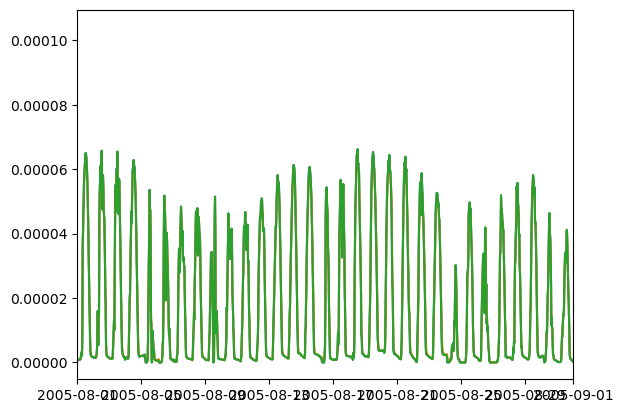

In [64]:
plt.plot(nc_output.Datasets_1D['PHYD']['date'], nc_output.Datasets_1D['PHYD']['stem_flow_avg'] )
plt.plot(nc_output.Datasets_1D['PHYD']['date'], nc_output.Datasets_1D['PHYD']['G_avg'] )
plt.plot(nc_output.Datasets_1D['PHYD']['date'], nc_output.Datasets_1D['SPQ']['transpiration_avg'])
# plt.plot(nc_output.times_np_64, nc_output.Datasets_1D['PHYD']['psi_stem_avg'] )
plt.xlim((datetime.datetime(2005,8,1),datetime.datetime(2005,9,1)))

In [68]:
nc_output.Datasets_1D['VEG'].groupby(pd.Grouper(key='date', freq='D'))

In [80]:
df_s = nc_output.Datasets_1D['VEG'].groupby(pd.Grouper(key='date', freq='d')).mean()    
df_s.index = pd.to_datetime(df_s.index)
df_s['dayofyear'] = df_s.index.dayofyear
df_ss  = df_s.groupby('dayofyear').mean()
df_ss

,index,time,vegpool_leaf_C,vegpool_fine_root_C,vegpool_coarse_root_C,vegpool_sap_wood_C,vegpool_heart_wood_C,vegpool_labile_C,vegpool_reserve_C,vegpool_fruit_C,total_veg_c,height,diameter,beta_sinklim,LAI,growth_resp_avg,maint_resp_avg,npp_avg
dayofyear,,,,,,,,,,,,,,,,,,
1,17885.000000,1.545349e+09,0.0,1.395982e-09,0.000155,0.004910,0.004671,7.890789e-08,5.935763e-08,1.605144e-09,0.010528,2.248367,0.007709,1.0,0.0,0.0,1.589494e-09,-1.589494e-09
2,17886.000000,1.545435e+09,0.0,1.387057e-09,0.000155,0.004896,0.004658,7.854044e-08,5.921828e-08,1.597048e-09,0.010501,2.248426,0.007709,1.0,0.0,0.0,1.491948e-09,-1.491948e-09
3,17887.000000,1.545521e+09,0.0,1.378189e-09,0.000154,0.004882,0.004646,7.820832e-08,5.905297e-08,1.588995e-09,0.010473,2.248486,0.007709,1.0,0.0,0.0,1.398961e-09,-1.398961e-09
4,17888.000000,1.545608e+09,0.0,1.369379e-09,0.000154,0.004869,0.004633,7.787605e-08,5.888817e-08,1.580984e-09,0.010445,2.248545,0.007709,1.0,0.0,0.0,1.410731e-09,-1.410731e-09
5,17889.000000,1.545694e+09,0.0,1.360626e-09,0.000153,0.004855,0.004621,7.755017e-08,5.870780e-08,1.573015e-09,0.010418,2.248605,0.007710,1.0,0.0,0.0,1.532320e-09,-1.532320e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,18245.757576,1.576518e+09,0.0,1.410294e-09,0.000051,0.001775,0.001780,8.077626e-08,5.966659e-08,1.066459e-09,0.004081,2.201756,0.007379,1.0,0.0,0.0,1.318330e-09,-1.318330e-09
363,18246.757576,1.576604e+09,0.0,1.401210e-09,0.000051,0.001770,0.001775,8.031474e-08,5.962275e-08,1.061314e-09,0.004071,2.201815,0.007379,1.0,0.0,0.0,1.407722e-09,-1.407722e-09
364,18247.757576,1.576691e+09,0.0,1.392185e-09,0.000051,0.001765,0.001770,7.986463e-08,5.955946e-08,1.056196e-09,0.004060,2.201874,0.007379,1.0,0.0,0.0,1.518959e-09,-1.518959e-09


In [74]:
df_s

,index,time,vegpool_leaf_C,vegpool_fine_root_C,vegpool_coarse_root_C,vegpool_sap_wood_C,vegpool_heart_wood_C,vegpool_labile_C,vegpool_reserve_C,vegpool_fruit_C,total_veg_c,height,diameter,beta_sinklim,LAI,growth_resp_avg,maint_resp_avg,npp_avg
date,,,,,,,,,,,,,,,,,,
1901-01-01,0.0,8.460000e+04,0.0,2.460230e-09,1.038655e-02,3.123294e-01,2.881065e-01,6.273894e-11,1.655949e-15,5.552166e-08,6.424599e-01,6.699299,0.039204,1.0,0.0,0.0,1.611407e-10,-1.611407e-10
1901-01-02,1.0,1.710000e+05,0.0,2.450619e-09,1.035458e-02,3.114503e-01,2.873385e-01,5.134513e-11,1.335760e-15,5.521826e-08,6.407375e-01,6.699287,0.039204,1.0,0.0,0.0,1.318765e-10,-1.318765e-10
1901-01-03,2.0,2.574000e+05,0.0,2.441046e-09,1.032272e-02,3.105736e-01,2.865725e-01,4.202052e-11,1.064200e-15,5.491651e-08,6.390198e-01,6.699275,0.039204,1.0,0.0,0.0,1.079268e-10,-1.079268e-10
1901-01-04,3.0,3.438000e+05,0.0,2.431510e-09,1.029095e-02,3.096995e-01,2.858086e-01,3.438933e-11,8.395494e-16,5.461641e-08,6.373068e-01,6.699264,0.039204,1.0,0.0,0.0,8.832664e-11,-8.832664e-11
1901-01-05,4.0,4.302000e+05,0.0,2.422012e-09,1.025928e-02,3.088278e-01,2.850467e-01,2.814400e-11,6.625134e-16,5.431796e-08,6.355984e-01,6.699252,0.039204,1.0,0.0,0.0,7.228595e-11,-7.228595e-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999-12-27,36130.0,3.121717e+09,0.0,0.000000e+00,2.013663e-13,9.417019e-10,9.999648e-09,5.716002e-32,0.000000e+00,0.000000e+00,1.094155e-08,2.109185,0.006625,1.0,0.0,0.0,1.468121e-31,-1.468121e-31
1999-12-28,36131.0,3.121803e+09,0.0,0.000000e+00,2.012973e-13,9.416278e-10,9.999710e-09,4.677912e-32,0.000000e+00,0.000000e+00,1.094154e-08,2.109185,0.006625,1.0,0.0,0.0,1.201493e-31,-1.201493e-31
1999-12-29,36132.0,3.121889e+09,0.0,0.000000e+00,2.012284e-13,9.415536e-10,9.999771e-09,3.828350e-32,0.000000e+00,0.000000e+00,1.094153e-08,2.109185,0.006625,1.0,0.0,0.0,9.832886e-32,-9.832886e-32


In [ ]:
plt.plot(nc_output.times_np_64, nc_output.Datasets_1D['PHYD']['stem_flow_avg'] )
plt.plot(nc_output.times_np_64, nc_output.Datasets_1D['PHYD']['G_avg'] )
plt.plot(nc_output.times_np_64, nc_output.Datasets_1D['SPQ']['transpiration_avg'] * 1000/18.0 )
plt.xlim((datetime.datetime(2005,5,5),datetime.datetime(2005,9,1)))

AttributeError: 'QNC_ncdf_reader' object has no attribute 'times_np_64'

(12913.0, 12935.0)

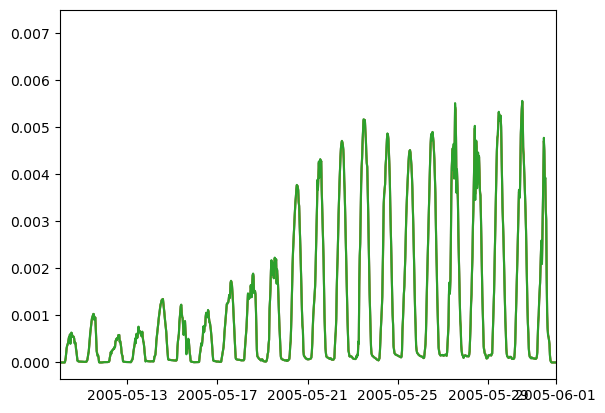

In [ ]:
plt.plot(nc_output.times_np_64, nc_output.Datasets_1D['PHYD']['stem_flow_avg'] )
plt.plot(nc_output.times_np_64, nc_output.Datasets_1D['PHYD']['G_avg'] )
plt.plot(nc_output.times_np_64, nc_output.Datasets_1D['SPQ']['transpiration_avg'] * 1000/18.0 )
plt.xlim((datetime.datetime(2005,5,10),datetime.datetime(2005,6,1)))

(12913.0, 12935.0)

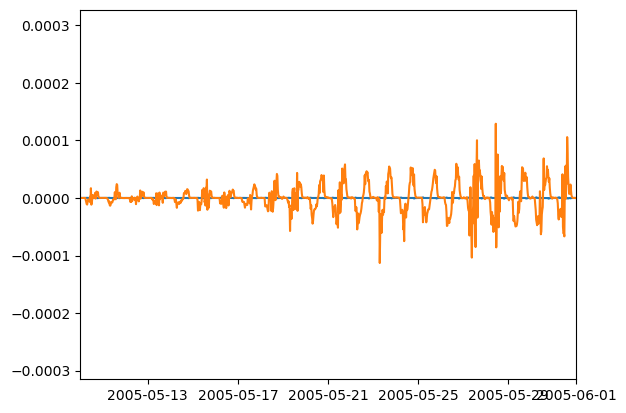

In [ ]:
plt.plot(nc_output.times_np_64, nc_output.Datasets_1D['PHYD']['stem_flow_avg']- nc_output.Datasets_1D['PHYD']['G_avg'] )
plt.plot(nc_output.times_np_64, nc_output.Datasets_1D['PHYD']['stem_flow_avg']- nc_output.Datasets_1D['SPQ']['transpiration_avg'] * 1000/18.0 )
plt.xlim((datetime.datetime(2005,5,10),datetime.datetime(2005,6,1)))